In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding= 'latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y='target'

In [8]:
df['target']=le.fit_transform(df[y])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

<AxesSubplot:xlabel='target', ylabel='count'>

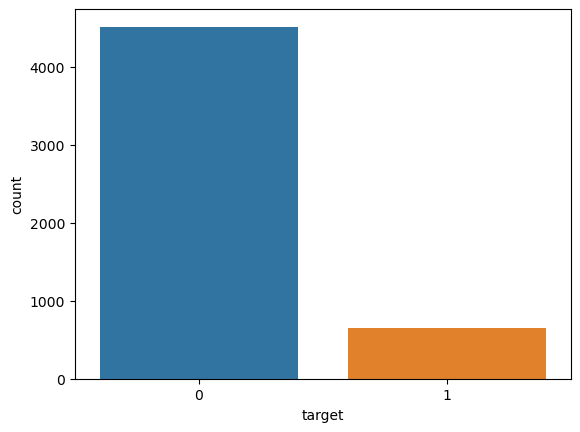

In [15]:
#0-ham,1-spam
import seaborn as sns
sns.countplot(x='target',data=df)

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
!pip install nltk

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_chars']=df['text'].apply(len)

In [20]:
df

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.sample(5)

,target,text,num_chars,num_words
261,0,Anyway i'm going shopping on my own now. Cos m...,85,22
5069,1,5p 4 alfie Moon's Children in need song on ur ...,160,36
1009,0,"Dear Hero,i am leaving to qatar tonite for an ...",108,27
4100,1,GSOH? Good with SPAM the ladies?U could b a ma...,167,36
4008,0,Ha... Then we must walk to everywhere... Canno...,112,25


In [23]:
df['num_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df.describe()

,target,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


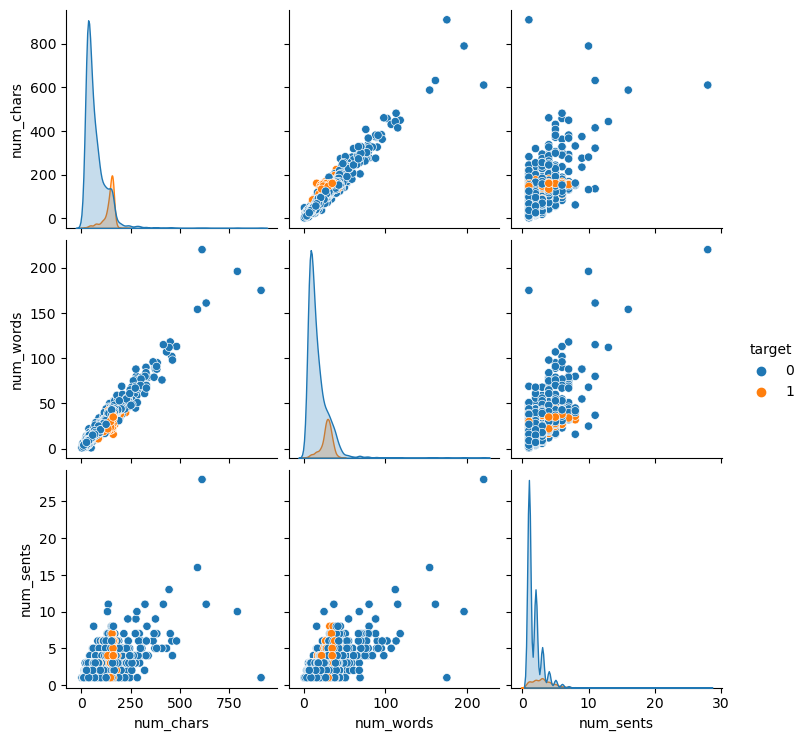

In [26]:
sns.pairplot(data=df,hue='target')

In [27]:
df.corr()

,target,num_chars,num_words,num_sents
target,1.000000,0.384717,0.262984,0.284901
num_chars,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sents,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

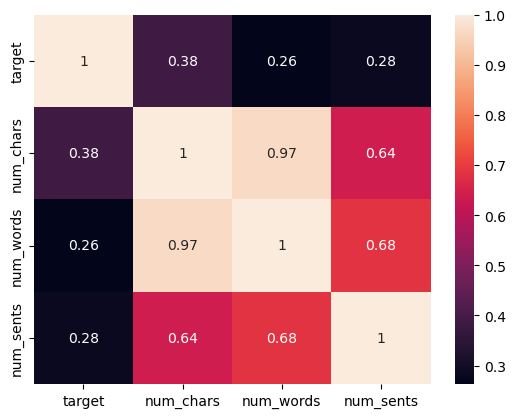

In [28]:
sns.heatmap(df.corr(),annot=True)

AxesSubplot(0.125,0.11;0.775x0.77)


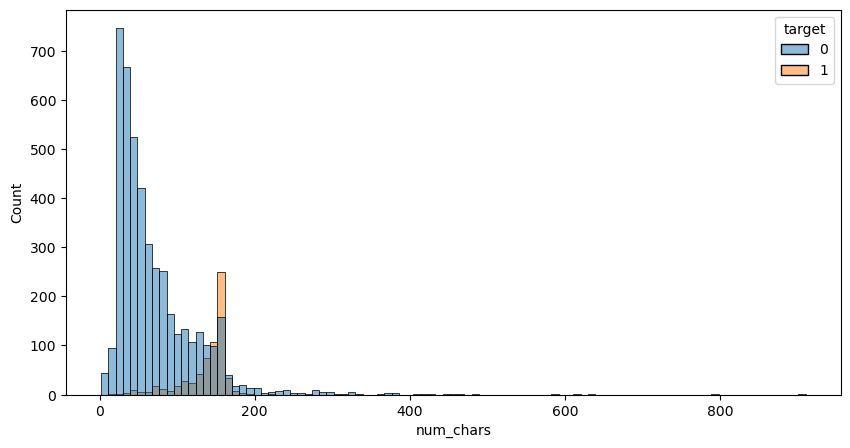

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
print(sns.histplot(x='num_chars',hue='target',data=df))
#print(sns.histplot(x='num_words',hue='target',data=df))

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text('I loved working with ML what about u???')

'love work ml u'

In [32]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [33]:
df['new_text']=df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_chars,num_words,num_sents,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud

In [37]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc_spam=wc.generate(df[df['target']==1]['new_text'].str.cat(sep=' '))

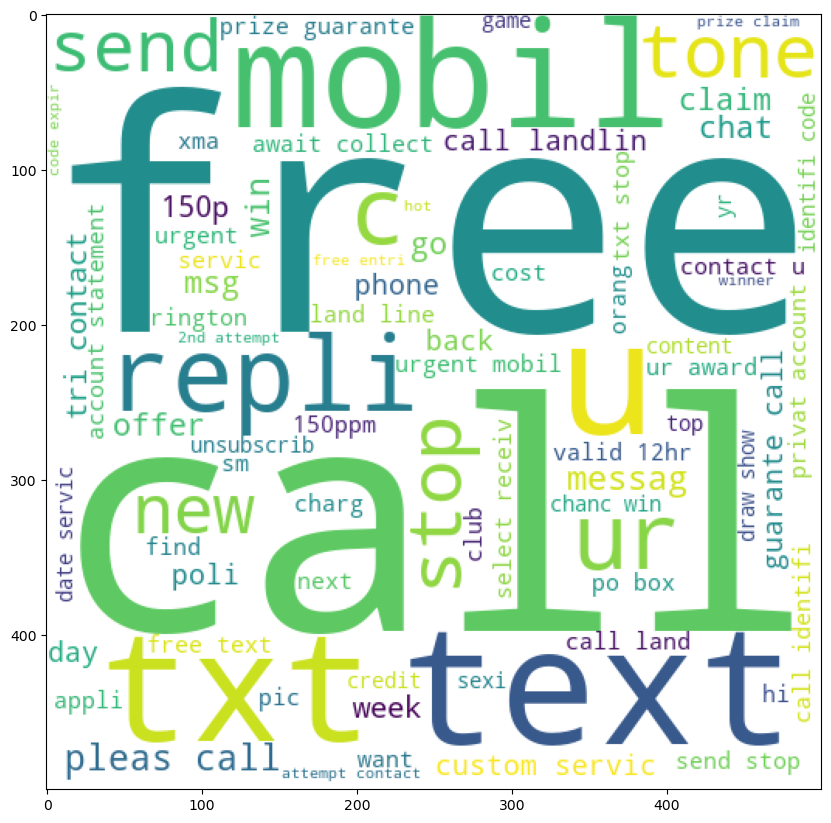

In [38]:
plt.figure(figsize=(10,12))
plt.imshow(wc_spam)

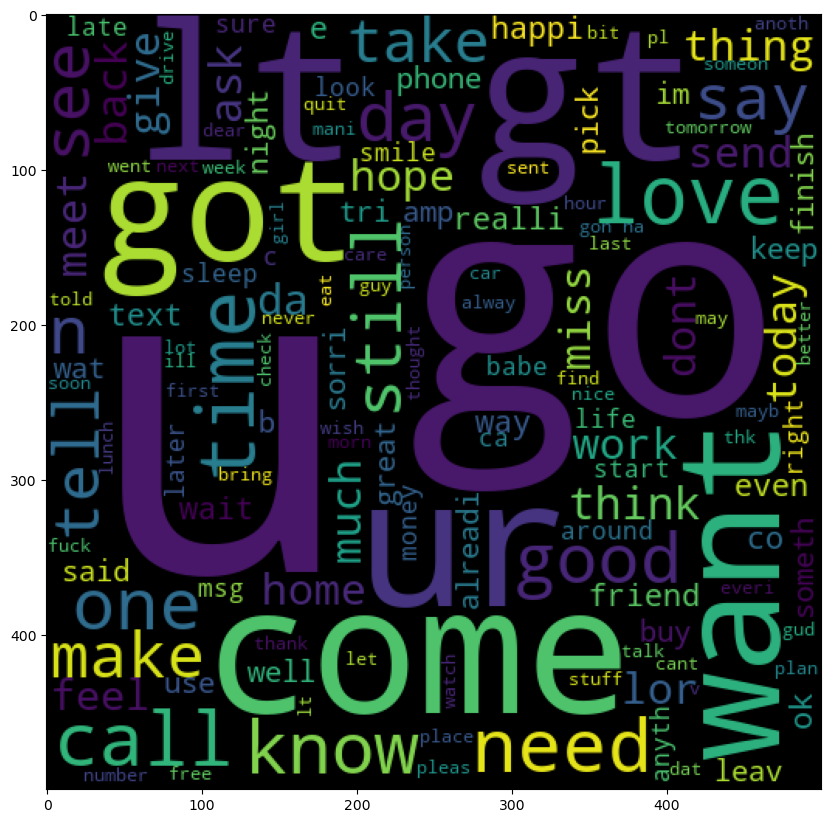

In [39]:
wc=WordCloud(width=500,height=500,min_font_size=10)
ham=wc.generate(df[df['target']==0]['new_text'].str.cat(sep=''))
plt.figure(figsize=(10,12))
plt.imshow(ham)


In [40]:
df[df['target']==0]['new_text'].tolist()
    

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [41]:
spam=[]
for msg in df[df['target']==0]['new_text'].tolist():
    for word in msg.split():
        spam.append(word)
        

In [42]:
from collections import Counter
import pandas as pd
pd.DataFrame(Counter(spam).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


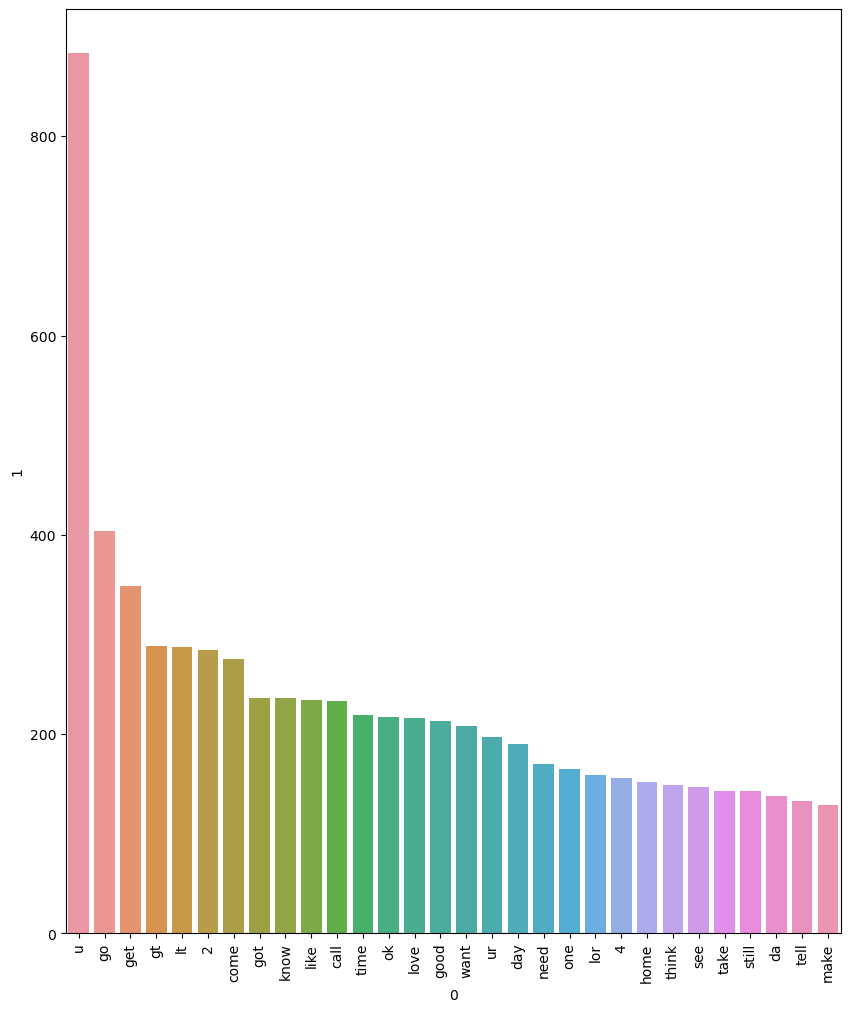

In [43]:
plt.figure(figsize=(10,12))
import seaborn as sns
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0],pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham=[]
for msg in df[df['target']==1]['new_text'].tolist():
    for word in msg.split():
        ham.append(word)

In [45]:
from collections import Counter
print("Ham:",Counter(ham))


Ham: Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt': 22, 'entri': 21, '

In [46]:
pd.DataFrame(Counter(ham).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


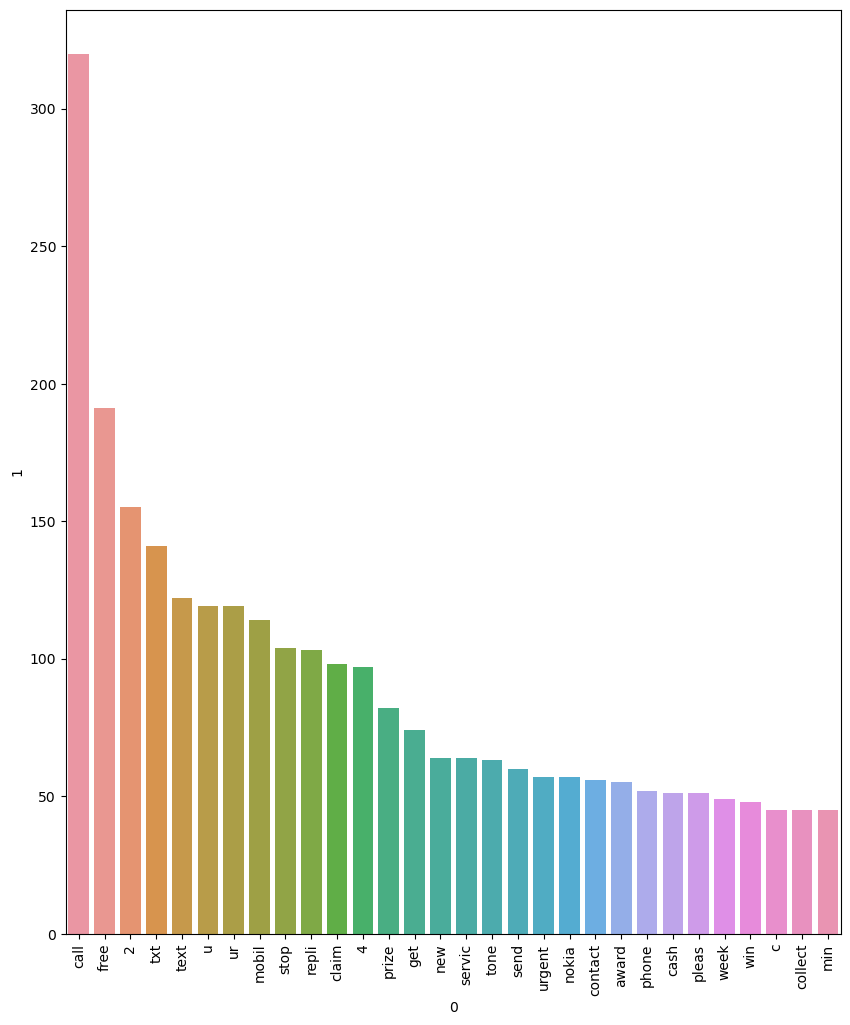

In [47]:
plt.figure(figsize=(10,12))
sns.barplot(pd.DataFrame(Counter(ham).most_common(30))[0],pd.DataFrame(Counter(ham).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df

,target,text,num_chars,num_words,num_sents,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['new_text']).toarray()
cv= CountVectorizer()
x1=cv.fit_transform(df['new_text']).toarray()

In [51]:
print("tfidf:",tfidf.idf_)
print("x1:",x1)


tfidf: [8.45201568 8.85748079 8.85748079 ... 8.85748079 8.85748079 5.61880233]
x1: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
y=df['target'].values


In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.2,random_state=0)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [57]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [58]:
gnb.fit(x_train,y_train)

GaussianNB()

In [59]:
y_pred4=gnb.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [61]:
accuracy_score(y_test,y_pred4)

0.8713733075435203

In [62]:
precision_score(y_test,y_pred4)

0.5336134453781513

In [63]:
confusion_matrix(y_test,y_pred4)

array([[774, 111],
       [ 22, 127]], dtype=int64)

# countvectorizer of gnb

In [64]:
gnb.fit(x_train1,y_train1)

GaussianNB()

In [65]:
y_pred1=gnb.predict(x_test1)

In [66]:
accuracy_score(y_test1,y_pred1)

0.8762088974854932

In [67]:
precision_score(y_test1,y_pred1)

0.5432098765432098

In [68]:
confusion_matrix(y_test1,y_pred1)

array([[774, 111],
       [ 17, 132]], dtype=int64)

In [69]:
mnb.fit(x_train,y_train)
mnb.fit(x_train1,y_train1)

MultinomialNB()

In [70]:
y_pred2=mnb.predict(x_test)
y_pred22=mnb.predict(x_test1)

In [71]:
print("tf:",accuracy_score(y_test,y_pred2))
print("cv:",accuracy_score(y_test1,y_pred22))

tf: 0.9700193423597679
cv: 0.9709864603481625


In [72]:
print("p_tf:",precision_score(y_test,y_pred2))
print("p_cv:",precision_score(y_test1,y_pred22))

p_tf: 0.9758064516129032
p_cv: 0.8940397350993378


In [73]:
print("tf:",confusion_matrix(y_test,y_pred2))
print("cv:",confusion_matrix(y_test1,y_pred22))

tf: [[882   3]
 [ 28 121]]
cv: [[869  16]
 [ 14 135]]


In [74]:
bnb.fit(x_train,y_train)
bnb.fit(x_train1,y_train1)

BernoulliNB()

In [75]:
y_pred3=bnb.predict(x_test)
y_pred33=bnb.predict(x_test1)

In [76]:
print("tf:",accuracy_score(y_test,y_pred3))
print("cv:",accuracy_score(y_test1,y_pred33))

tf: 0.9661508704061895
cv: 0.9661508704061895


In [77]:
print("tf:",precision_score(y_test,y_pred3))
print("cv:",precision_score(y_test1,y_pred33))

tf: 0.9672131147540983
cv: 0.9672131147540983


In [78]:
print("tf:",confusion_matrix(y_test,y_pred3))
print("cv:",confusion_matrix(y_test1,y_pred33))

tf: [[881   4]
 [ 31 118]]
cv: [[881   4]
 [ 31 118]]


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
ETC=ExtraTreesClassifier(n_estimators=50,random_state=2)
rf=RandomForestClassifier(n_estimators=50,random_state=2)
lg=LogisticRegression(solver='liblinear',penalty='l1')

In [81]:
def classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [82]:
classifier(svc,x_train,x_test,y_train,y_test)

(0.9690522243713733, 0.975609756097561)

In [83]:
classifier(mnb,x_train,x_test,y_train,y_test)

(0.9458413926499033, 1.0)

In [84]:
classifier(ETC,x_train,x_test,y_train,y_test)

(0.971953578336557, 0.9838709677419355)

In [85]:
classifier(rf,x_train,x_test,y_train,y_test)

(0.9709864603481625, 1.0)

In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))